In [1]:
import glob
import pandas as pd

In [2]:
path = "A:/Sp23 - Predictive Analytics/Conagra Data Files/Data"

In [3]:
file_list = glob.glob(path + "/IRI_POS_Tablespreads_20*.xlsx")

In [4]:
excel_list =[]

In [5]:
for file in file_list:
    excel_list.append(pd.read_excel(file))

In [6]:
excel_merged = pd.concat(excel_list, ignore_index = True)

In [7]:
ts_merged = pd.DataFrame(excel_merged)

In [8]:
ts_merged['Time'] = ts_merged["Time"].str[-8:]
ts_merged["Time"] = pd.to_datetime(ts_merged["Time"], format = '%m-%d-%y')

In [9]:
ts_attribute = pd.read_excel(path + "/IRI_POS_Tablespreads_Product Attribute File.xlsx")

In [10]:
ts_joined = pd.merge(ts_merged,ts_attribute,on ="UPC 13 digit",  how='left')

In [11]:
ts_joined = ts_joined.drop(columns = ["Geography_y", "Time_y"])

In [12]:
ts_joined["Total_sales"] = ts_joined["Base Dollar Sales"] + ts_joined["Incremental Dollars"]

In [13]:
#ts_joined.dtypes

In [14]:
#ts_joined.head()

In [15]:
#ANOVA TEST FOR FORM AND TOTAL SALES
#There is no significan difference between the means of total sales of all different forms

In [16]:
form_sales = ts_joined[["CAG Form Value", "Total_sales"]]

In [17]:
form_sales.rename(columns = {'CAG Form Value':'CAG_Form_Value'}, inplace = True)

C:\Users\arshi\AppData\Local\Temp\ipykernel_28540\3594466020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form_sales.rename(columns = {'CAG Form Value':'CAG_Form_Value'}, inplace = True)


In [18]:
form_sales.shape

(1316655, 2)

In [19]:
form_sales = form_sales.dropna()

In [20]:
form_sales.shape

(786518, 2)

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod_FS = ols('Total_sales ~ CAG_Form_Value',
                data=form_sales).fit()
                
aov_table_FS = sm.stats.anova_lm(mod_FS, typ=2)
print(aov_table_FS)

                      sum_sq        df           F  PR(>F)
CAG_Form_Value  2.505742e+14       3.0  2109.94286     0.0
Residual        3.113514e+16  786514.0         NaN     NaN


In [23]:
esq_sm_FS = aov_table_FS['sum_sq'][0]/(aov_table_FS['sum_sq'][0]+aov_table_FS['sum_sq'][1])
aov_table_FS['EtaSq'] = [esq_sm_FS, 'NaN']
print(aov_table_FS)

                      sum_sq        df           F  PR(>F)     EtaSq
CAG_Form_Value  2.505742e+14       3.0  2109.94286     0.0  0.007984
Residual        3.113514e+16  786514.0         NaN     NaN       NaN


In [24]:
#R2 and Adjusted R2
mod_FS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2110.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:11:11   Log-Likelihood:            -1.0712e+07
No. Observations:              786518   AIC:                         2.142e+07
Df Residuals:                  786514   BIC:                         2.142e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2.517e+04    600.436     41.916      0.000     2.4e+04    2.63e+04
CAG_Form_Value[T.SPRAY/SQUEEZE]  3.371e+04   1905.811     17.689      0.000       3e+04    3.74e+04
CAG_Form_Value[T.STICKS]         4.878e+04    697.696     69.919      0.000    4.74e+04    5.01e+04
CAG_Form_Value[T.TUBS]           1.894e+04    687.954     27.531      0.000    1.76e+04    2.03e+04
==============================================================================
Omnibus:                  1728969.135   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      23325345052.879
Skew:                          19.876   Prob(JB):                         0.00
Kurtosis:                     845.719   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#ANOVA TEST FOR GEOGRAPHY AND TOTAL SALES
#There is no significant difference between the means of 8 geographical locations

In [26]:
geo_sales = ts_joined[["Geography_x", "Total_sales"]]

In [27]:
geo_sales.shape

(1316655, 2)

In [28]:
geo_sales = geo_sales.dropna()

In [29]:
geo_sales.shape

(789822, 2)

In [30]:
mod_GS = ols('Total_sales ~ Geography_x',
                data=geo_sales).fit()
                
aov_table_GS = sm.stats.anova_lm(mod_GS, typ=2)
print(aov_table_GS)

                   sum_sq        df            F  PR(>F)
Geography_x  9.189291e+14       8.0  2976.438939     0.0
Residual     3.048030e+16  789813.0          NaN     NaN


In [31]:
esq_sm_GS = aov_table_GS['sum_sq'][0]/(aov_table_GS['sum_sq'][0]+aov_table_GS['sum_sq'][1])
aov_table_GS['EtaSq'] = [esq_sm_GS, 'NaN']
print(aov_table_GS)

                   sum_sq        df            F  PR(>F)     EtaSq
Geography_x  9.189291e+14       8.0  2976.438939     0.0  0.029266
Residual     3.048030e+16  789813.0          NaN     NaN       NaN


In [32]:
#R2 and Adjusted R2
mod_GS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_sales   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2976.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:11:13   Log-Likelihood:            -1.0747e+07
No. Observations:              789822   AIC:                         2.149e+07
Df Residuals:                  789813   BIC:                         2.149e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          3.292e+04    809.209     40.680      0.000    3.13e+04    3.45e+04
Geography_x[T.Great Lakes - IRI Standard - Multi Outlet + Conv]    4484.8531   1055.296      4.250      0.000    2416.507    6553.199
Geography_x[T.Mid-South - IRI Standard - Multi Outlet + Conv]     -3256.1046   1044.833     -3.116      0.002   -5303.942   -1208.267
Geography_x[T.Northeast - IRI Standard - Multi Outlet + Conv]      1.289e+04   1038.305     12.413      0.000    1.09e+04    1.49e+04
Geography_x[T.Plains - IRI Standard - Multi Outlet + Conv]        -1.307e+04   1082.400    -12.078      0.000   -1.52e+04    -1.1e+04
Geography_x[T.South Central - IRI Standard - Multi Outlet + Conv]   185.5744   1126.793      0.165      0.869   -2022.902    2394.051
Geography_x[T.Southeast - IRI Standard - Multi Outlet + Conv]      1.061e+04   1098.981      9.656      0.000    8458.230    1.28e+04
Geography_x[T.Total US - Multi Outlet + Conv]                      8.016e+04    926.759     86.500      0.000    7.83e+04     8.2e+04
Geography_x[T.West - IRI Standard - Multi Outlet + Conv]            865.6192   1095.039      0.790      0.429   -1280.621    3011.859
==============================================================================
Omnibus:                  1741475.112   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      24762452817.075
Skew:                          20.000   Prob(JB):                         0.00
Kurtosis:                     869.514   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#CHI SQUARE TEST FOR GEOGRAPHY AND FORM
# Geo and form are independent

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
geo_form = ts_joined[["Geography_x", "CAG Form Value"]]

In [36]:
contigency= pd.crosstab(geo_form['Geography_x'], geo_form['CAG Form Value'])
contigency

CAG Form Value,ALL OTHER FORM,SPRAY/SQUEEZE,STICKS,TUBS
Geography_x,,,,
California - IRI Standard - Multi Outlet + Conv,19522,1151,33144,40248
Great Lakes - IRI Standard - Multi Outlet + Conv,29909,1629,53456,60801
Mid-South - IRI Standard - Multi Outlet + Conv,20306,1660,55270,65888
Northeast - IRI Standard - Multi Outlet + Conv,37041,1611,62160,77663
Plains - IRI Standard - Multi Outlet + Conv,20065,1293,39970,50739
South Central - IRI Standard - Multi Outlet + Conv,16424,1459,35952,45642
Southeast - IRI Standard - Multi Outlet + Conv,18927,1436,41486,55213
Total US - Multi Outlet + Conv,70521,2810,118396,121947
West - IRI Standard - Multi Outlet + Conv,20074,2099,43287,43712


In [37]:
contigency_pct = pd.crosstab(geo_form['Geography_x'], geo_form['CAG Form Value'], normalize='index')
contigency_pct

CAG Form Value,ALL OTHER FORM,SPRAY/SQUEEZE,STICKS,TUBS
Geography_x,,,,
California - IRI Standard - Multi Outlet + Conv,0.207537,0.012236,0.352352,0.427874
Great Lakes - IRI Standard - Multi Outlet + Conv,0.205144,0.011173,0.366652,0.417031
Mid-South - IRI Standard - Multi Outlet + Conv,0.141877,0.011598,0.386169,0.460356
Northeast - IRI Standard - Multi Outlet + Conv,0.207542,0.009026,0.348284,0.435148
Plains - IRI Standard - Multi Outlet + Conv,0.179045,0.011538,0.356662,0.452756
South Central - IRI Standard - Multi Outlet + Conv,0.165103,0.014667,0.361410,0.458820
Southeast - IRI Standard - Multi Outlet + Conv,0.161684,0.012267,0.354393,0.471656
Total US - Multi Outlet + Conv,0.224823,0.008958,0.377449,0.388770
West - IRI Standard - Multi Outlet + Conv,0.183875,0.019227,0.396503,0.400396


<AxesSubplot:xlabel='CAG Form Value', ylabel='Geography_x'>

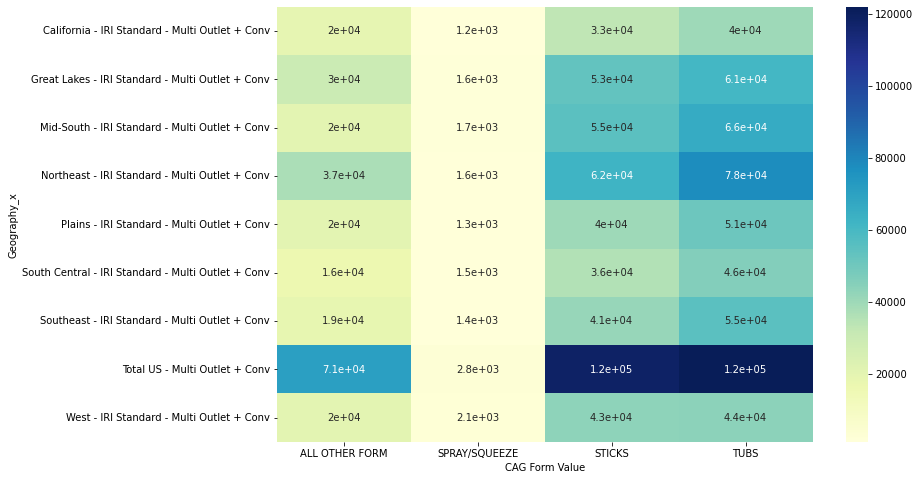

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [39]:
c, p, dof, expected = chi2_contingency(contigency)
print("c= ",c)
print("p= ",p)
print("dof= ",dof)

c=  9538.940515074088
p=  0.0
dof=  24
